# **Problem set 4** - Machine Learning for Physics and Astronomy 2023/2024, UvA

#### Maxwell A. Fine
### 14880725

- The total sheet gives 27 points
- Deadline for submitting your results is **Wed, 8/5/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

In [4]:
pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 5.1 MB/s eta 0:00:00m eta 0:00:01m0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 8.7 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 7.9 MB/s eta 0:00:000m eta 0:00:010:00:01
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Chapter 7: Basic Deep learning - The Multi Layer Perceptron （14 points）

### 7.1 Pytorch Basics (4 points)

In this exercise, we will be exploring some basic aspects of `pytorch`, its `autograd` functionality, and connecting the neural network theory to code.

Consider the folloiwng simple linear model. This is equivalent to the Logistic Regression model from last week, with 5 inputs and 1 output. We now take a look at a print out of its internal parameters. Now is a good time to (re-)familiarize yourself with the [PyTorch documentation](https://pytorch.org/docs/stable/index.html). Before asking questions, make sure you seek solutions by searching the official documentation link provided above (or try using other tools like large language models and popular search engines).

In [9]:
# define a machine learning "model", here a simple linear layer
model = torch.nn.Linear(5, 1)

# iterate over all parameters in the model
for par in model.parameters():
    # print parameter (pytorch can print out the parameters nicely for us)
    print(par)

    # print shape and gradient
    print('shape:', par.shape, 'gradient:', par.grad)
    print('----')

Parameter containing:
tensor([[-0.2060,  0.1542,  0.3887, -0.2576, -0.0915]], requires_grad=True)
shape: torch.Size([1, 5]) gradient: None
----
Parameter containing:
tensor([0.2794], requires_grad=True)
shape: torch.Size([1]) gradient: None
----


1. (1 point) What is the mathematical definition of this model? How do the printed parameters of the model relate to the mathematical defintion, i.e. what does each parameter represent?  What is `par.grad` showing, and why is it `None`?  Why does it make sense that `requires_grad` is initialized to `True`?

Its a linear model so something like this!

$$y = xA^T + b $$

where:

$y $ is the output.
$ x $ is the input vector.
$ A $ is the matrix of weights.
$ b $ is the bias vector.
$ A^T $ denotes the transpose of matrix $ A $.

Since this is a linear layer that maps from 5-dimensional input to a 1-dimensional output, the weight matrix $ A $ will have a shape of $[1, 5]$, and the bias $ b $ will be a single scalar (or a 1-dimensional tensor with one element).


The first printed tensor, which has a shape of $[1, 5]$, represents the weight matrix $ A $ in the mathematical definition. Each of its elements corresponds to the weights applied to the input features before summing them up.
The second printed tensor, which is a single-element tensor, represents the bias $ b $ in the mathematical definition. It is added to the weighted sum of inputs to produce the final output.

`gradient = None`:

is None because no backward pass has been computed yet. Gradients are calculated during the backward pass, and since this pass has not occurred, there are no gradients to show.

`requires_grad=True`:

Setting requires_grad to True is essential for training the model as it tells PyTorch to track all the operations on the tensor. This is necessary because, during the training process, PyTorch needs to compute gradients with respect to these parameters in order to perform the optimization step (usually gradient descent or its variants).
By default, when you create a parameter in PyTorch (like the weights and biases of a model), requires_grad is set to True so that gradients will be computed for these tensors when the backward pass is called, allowing the model to learn from the data..






Now let us provide an input tensor $x$ for our model and compute the gradients with respect to our parameters. This is done via the `.backward()` call.

In [28]:
x = torch.tensor([1., 2., 3., 4., 5.])
model = torch.nn.Linear(5, 1)
y = model(x)
y.backward()
for par in model.parameters():
    print(par, par.shape, par.grad)

Parameter containing:
tensor([[-0.3848,  0.0673, -0.0220,  0.0078, -0.4107]], requires_grad=True) torch.Size([1, 5]) tensor([[1., 2., 3., 4., 5.]])
Parameter containing:
tensor([0.0765], requires_grad=True) torch.Size([1]) tensor([1.])


2. (1 point) Analytically, what are the gradients that the above code calculates? This should stem from your model definition. Note that `par.grad` is no longer None. What information does `par.grad` contain?

The gradients that the above code calculates are the partial derivatives of the output $y$ with respect to each parameter in the model. 

Since we have a single output, this simplifies to $$ y = x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + b $$, 
where $ w_1, w_2, w_3, w_4, w_5 $ are the weights and $b $ is the bias.

For a given parameter $ w_i $, the gradient is calculated as $ \frac{\partial y}{\partial w_i} $. Since $ y $ is a linear combination of the inputs and the weights, the gradient with respect to a weight $ w_i $ is just the corresponding input value $ x_i $.

Analytically, the gradients for the weights are:

$$ \frac{\partial y}{\partial w_1} = x_1, \frac{\partial y}{\partial w_2} = x_2, \frac{\partial y}{\partial w_3} = x_3, \frac{\partial y}{\partial w_4} = x_4, \frac{\partial y}{\partial w_5} = x_5 $$

And the gradient for the bias is:

$$ \frac{\partial y}{\partial b} = 1 $$

This is because the derivative of $ y $ with respect to $ b $ is 1, as $ b $ contributes a constant term to the output $ y $.


par.grad Information:

After the backward pass, par.grad contains the computed gradients for each parameter. Specifically, it will hold:

A tensor of the same shape as the weight tensor $ A $, containing the gradients with respect to each weight. These values will be equal to the input vector $ x $ since the input is directly multiplied by the weights in the linear transformation.
A tensor of the same shape as the bias $ b $, in this case a single-element tensor, containing the gradient with respect to the bias, which will be 1.
The gradients stored in par.grad are used during the optimization step to update the parameters in the direction that minimally reduces the loss function during training..

3. (1 point) Let's now switch to an ever so slightly more complex model: a multi-layer perceptron (MLP) with two hidden layers (with 10 and 4 hidden neurons). What is the mathemtatical defintion of the following model, which is defined using `nn.Sequential`?  Inspect its internal parameters. How are the internal parameters of the model related to the mathematical defintion you wrote down?

In [29]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), torch.nn.ReLU(),
    torch.nn.Linear(10, 4), torch.nn.ReLU(),
    torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

In [30]:
# YOUR CODE HERE

# copy and paste from above
# iterate over all parameters in the model
for par in model.parameters():
    # print parameter (pytorch can print out the parameters nicely for us)
    print(par)

    # print shape and gradient
    print('shape:', par.shape, 'gradient:', par.grad)
    print('----')

Parameter containing:
tensor([[-4.3522e-02, -1.3984e-04],
        [ 3.0244e-01,  5.3667e-01],
        [-5.1387e-01,  5.1095e-01],
        [-2.6596e-01, -5.7158e-02],
        [-2.1664e-02, -3.3066e-01],
        [-6.8042e-01, -1.6559e-01],
        [ 6.1274e-02,  6.5791e-01],
        [-4.8963e-03, -3.9630e-01],
        [ 2.3082e-01,  8.2475e-02],
        [-2.3477e-01,  4.1474e-01]], requires_grad=True)
shape: torch.Size([10, 2]) gradient: None
----
Parameter containing:
tensor([ 0.1116, -0.2002,  0.2616, -0.4868,  0.5072, -0.5582, -0.4917,  0.1555,
         0.4873,  0.6734], requires_grad=True)
shape: torch.Size([10]) gradient: None
----
Parameter containing:
tensor([[ 0.2400, -0.1124, -0.1322, -0.0075,  0.2385, -0.2278,  0.1107, -0.2375,
          0.0619, -0.2865],
        [-0.2892,  0.2664,  0.1743,  0.0646,  0.0303,  0.0738, -0.0252,  0.0119,
          0.0056,  0.1001],
        [ 0.1128, -0.0128,  0.1797,  0.1776,  0.2968,  0.2316, -0.1969, -0.2002,
          0.1457,  0.3057],
        

First Hidden Layer:

Linear transformation (H_1): $ \mathbf{h}_1 = \mathbf{x}W_1 + \mathbf{b}_1 $
Activation function ReLU: $ \mathbf{a}_1 = \text{ReLU}(\mathbf{h}_1) $ where $ W_1 $ is a matrix of weights with shape [2, 10], and $ \mathbf{b}_1 $ is a bias vector with 10 elements.
Second Hidden Layer:

Linear transformation (H_2): $ \mathbf{h}_2 = \mathbf{a}_1W_2 + \mathbf{b}_2 $
Activation function ReLU: $ \mathbf{a}_2 = \text{ReLU}(\mathbf{h}_2) $ where $ W_2 $ is a matrix of weights with shape [10, 4], and $ \mathbf{b}_2 $ is a bias vector with 4 elements.
Output Layer:

Linear transformation (H_3): $ \mathbf{h}_3 = \mathbf{a}_2W_3 + \mathbf{b}_3 $
Activation function Sigmoid: $ y = \sigma(\mathbf{h}_3) $ where $ W_3 $ is a matrix of weights with shape [4, 1], and $ \mathbf{b}_3 $ is a single-element bias vector since there's only one output neuron.
In the above equations, ReLU (Rectified Linear Unit) is an element-wise activation function defined as $ \text{ReLU}(z) = \max(0, z) $, and $ \sigma $ denotes the Sigmoid activation function, defined as $ \sigma(z) = \frac{1}{1 + e^{-z}} $.


We can write the Neural Network as

$$ Y = H_3(H_2(H_1(X)))$$

Where $H_i$ is each layer

The paramters are the weight matrixes and B for each layer

4. (0.5 point) Run different random tensors generated with `torch.randn(...)` through the previous model. Start with tensors of the shape (2,), (1,2),(9, 2), (2, 4, 2). How are input shapes connected to output shapes? What is the role of the last dimension and what constraints do we have there?

*Hint: Consider the case of training a neural network, i.e. passing the neural network many individual examples. In that case, what do the first dimension(s) represent?*

In [31]:
# YOUR SOLUTION
input_shapes = [(2,), (1, 2), (9, 2), (2, 4, 2)]

for shape in input_shapes:
    x = torch.randn(shape)
    y = model(x)
    print(f"Input shape: {x.shape}, Output shape: {y.shape}")

Input shape: torch.Size([2]), Output shape: torch.Size([1])
Input shape: torch.Size([1, 2]), Output shape: torch.Size([1, 1])
Input shape: torch.Size([9, 2]), Output shape: torch.Size([9, 1])
Input shape: torch.Size([2, 4, 2]), Output shape: torch.Size([2, 4, 1])


The last dimension of the input tensor must match the number of input features that the model expects in our case 2. 

For an input tensor with shape (2,), the model views it as a single instance with 2 features. It should output a single scalar because the output layer produces a 1-dimensional output.

For an input tensor with shape (1, 2), the model sees it as a batch containing one instance with 2 features. The output will be a tensor with shape (1, 1), representing a batch with one output value.

For an input tensor with shape (9, 2), the model interprets it as a batch of 9 instances, each with 2 features. The output will be a tensor with shape (9, 1), representing a batch of 9 output values.

For an input tensor with shape (2, 4, 2), the model treats it as a batch of 2 instances, each being a sequence (or another batch) of 4 instances with 2 features. The output will be a tensor with shape (2, 4, 1), maintaining the batch and sequence dimensions but reducing the feature dimension to 1 because the output layer has a single output neuron.

Batch Dimension: This is the first dimension of the input tensor when you're dealing with batches of data. In machine learning, it's common to train models using batches for efficiency and to take advantage of parallel computation. The batch dimension allows the model to process multiple examples at once. For instance, an input tensor with shape (9, 2) indicates a batch of 9 examples, each with 2 features.

Sequence Dimension: In some cases, particularly with sequential data such as time series or text, you might have an additional dimension that represents the sequence length. For example, if you're processing sentences of words, the sequence dimension would represent the number of words in each sentence.

The last Dimension of the output will always be 1 in our case


5. (0.5 points) Give one additional shape that would lead to an error when tried and explain why!

In [32]:
# YOUR SOLUTION
input_shapes = [(1,)]

for shape in input_shapes:
    x = torch.randn(shape)
    y = model(x)
    print(f"Input shape: {x.shape}, Output shape: {y.shape}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 2x10)

The error is caused by having the input last dimension be not 2, this is incompatiable with the matrix multiplications 

**Usage** of AI: *COMMENT HERE*

### 7.2 Classification! From logistic regression to classification with MLPs (5 points)


This exercise will show you how to solve more complicated classification tasks using MLPs with PyTorch. We will here use our own toy simulator to generate training data sets.  The simulator that is implemented below produces points in the 2-dim hypercube and classifies them as y = 0, 1 in a ring-segment pattern.  There are two parameters that you can play with to change that pattern.

Below is an example code that targets this classification problem with a neural network using one (output) node with a sigmoid activation function, similar to what was used for the logistic regression in exercise sheets 3 and 4. Try to run and understand the code.

In [33]:
torch.manual_seed(0)

In [34]:
def simulator(nsamples, contrast = 7, scale = 7):
    X = torch.rand(nsamples, 2)
    R = torch.sqrt(X[:,0]**2 + X[:,1]**2)
    p = torch.sigmoid(torch.cos(R*scale)*contrast)
    y = torch.bernoulli(p)
    return X, y

X, y = simulator(3000)  # Data set

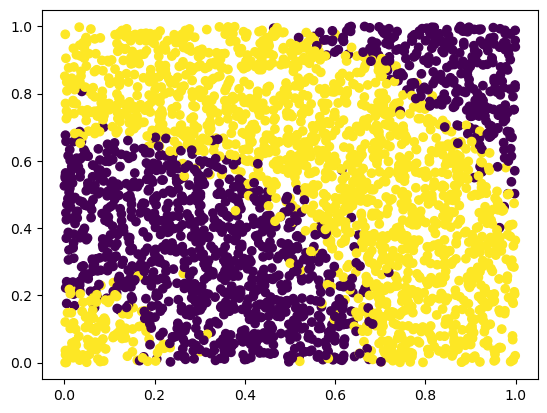

In [35]:
# This is our data
plt.scatter(X[:,0], X[:,1], c = y)

In [36]:
# We scale the coordinates to mean zero and standard deviation one, which makes it easier to train the neural networks.
X_scaled = X - X.mean(axis=0)
X_scaled = X_scaled/X_scaled.std(axis=0)

In [37]:
# This our logistic regression model with linear basis functions, using the compact `nn.Sequential` technique to define the network.
model = torch.nn.Sequential(torch.nn.Linear(2, 1), torch.nn.Sigmoid())

Here we are using the so called [Adam](https://arxiv.org/abs/1412.6980) optimizer. It's update step is slightly more sophisticated than the basic stochastic gradient descent optimizer used in the last exercise sheet. Instead of `torch.optim.SGD`, it can be accessed as `torch.otpim.Adam`.

In [38]:
# We now define loss function and optimizer
criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()   # same as torch.nn.BCELoss(), note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)  # An alternative optimizer

AttributeError: module 'torch._functorch.eager_transforms' has no attribute 'grad_and_value'

In [40]:
# This is a standard training loop
loss_hist = []
nbatch = 32  # number of training examples per minibatch
nepochs = 20 # numer of epoches, i.e. times we iterate through the entire dataset

for epoch in range(nepochs):
    # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
    shuffle = np.random.permutation(len(X))
    X_shuffled = X_scaled[shuffle]
    y_shuffled = y[shuffle]


    for i in range(len(X)//nbatch):
        X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
        y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

        optimizer.zero_grad()

        # forward pass
        y_pred = model(X_scaled_batch).squeeze(1)

        # compute loss
        loss = criterion(y_pred, y_batch)
        # backward pass
        loss.backward()
        optimizer.step()

    loss_hist.append(loss.item())
plt.plot(loss_hist)

NameError: name 'optimizer' is not defined

In [ ]:
y_pred = model(X_scaled).squeeze(1).detach().numpy()
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.colorbar()

This is actually a pretty bad result, since it does not reflect our training data.  This is not a surprise, since the simple linear regression model with linear basis functions cannot generate a pattern like our training data. We will improve now in the next steps.

1.  (1 point) Explain briefly (one sentence each and in your own words) the role of the following components of the training loop: `nbatch`, `//`, `zero_grad()`, `.backward()`, `optimizer.step()`?

YOUR SOLUTION

2. (1 point) We saw above that the output of our model does not look like what we want. To judge this more quantitatively, write an accuracy function, similar to exercise sheet 2, and quantify the performance of the model using the 3000 points used for training. Use `np.around` to round the predictions of the network, compare with the truth, and calculate the fraction of matches.

*Hint*: The accuracy here is measured by the frequency in which the model gives higher probability to the true label.

In [ ]:
def accuracy(model, data, target):
    # YOUR SOLUTION
    raise NotImplementedError

# YOUR CODE HERE

3. (3 points) Improve the above model by introducing an additional hidden layer. Try out 2, 5, 25 and 50 as sizes for the single hidden layer. Use a ReLU activation function (`torch.nn.ReLU()`). How does it affect the result qualitatively? Evaluate this using the accuracy function from above.

In [ ]:
# YOUR SOLUTION

**Usage** of AI: *COMMENT HERE*

### 7.3 Regression! Testing the universal function approximation theorem (5 points)


In this exercise we will use a single layer perceptron to perform regression. We will, in this way, test the universal function approximation theorem by checking if such a simple neural network can approximate the cosine function well.

1. (1 point) Generate training data from a cosine function, `y = cos(x*4)`, with 1000 values of `x` uniformly drawn from [-1, 1]. Plot your function.

*Hint: Remember to convert your x and y data to torch tensors, if you create them using numpy.*

In [ ]:
# YOUR COD EHRE

2. (2 points) Define a network that implements a simple single-layer perceptron that maps general 1-dim inputs (x) onto general 1-dim outputs (y), with `nhidden` hidden parameters in the hidden layer. Use the ReLu activation function after the hidden layer. Instead of using `nn.Sequential` like above, complete the network class below. You have encountered this way of defining models before in section 6.3 on exercise sheet 4.

In [ ]:
class SimplePerceptron(torch.nn.Module):
    def __init__(self, nhidden):
        # YOUR SOLUTION
        pass

    def forward(self, x):
        # YOUR SOLUTION
        return x

3. (2 points) Train that model to recover the cosine curve. You should do so by minimizing the mean square error between the predicted function and the ground truth cosine function defined above. What is the minimum number of hidden parameters that you need for results that you would consider satisfactory?

*Hint: Pytorch has a built-in MSE loss you may use, check the documentation.  It helps to randomize the ordering of the data to improve training. Consider a minibatch size of 16 or 32, about 100-200 epochs, and a small enough learning rate.*

In [ ]:
# YOUR SOLUTION

**Usage** of AI: *COMMENT HERE*

## Chapter 8: Convolutional Neural Networks (13 points)

In this exercise, we will be building a convolutional network in PyTorch to recognize handwritten digits as given in the MNIST dataset.

Required reading (*pior* to starting the exercises!):

https://nextjournal.com/gkoehler/pytorch-mnist (Excellent blog post on which these exercises are based)

https://en.wikipedia.org/wiki/MNIST_database (Description of the dataset we will be working with)

### 8.1 Convolutions (1 point)

1. (1 point)
  Before implementing convolutions using pytorch below, let us make sure we understand what they are doing, by hand.

  Consider the convolutional kernel

  $$
  K = \begin{pmatrix}
    1 & 2 \\
    3 & 4
  \end{pmatrix} \,,
  $$

  and the  input data

  $$
  I = \begin{pmatrix}
    -1 & 1 & 0 \\
    1 & -1 & -1 \\
    1 & 1 & 1
  \end{pmatrix} \,.
  $$

  By hand, compute the convolution $I \circledast K$ without padding (also known as 'valid', so your output should be a 2x2 matrix).

YOUR ANSWER HERE

2. (2 point) Convolutional layers are the basic building block of deep convolutional neural networks that are used for image analysis tasks.
(a) Consider a 2-dim convolution layer with 2-channel input and 4-channel output. What is the number of parameters of that kernel if the kernel size is $5 \times 5$, including bias parameters?
(b) Describe in what sense convolutional layers are translation invariant. Are they rotation variant? (3-5 lines)

YOUR ANSWER HERE

**Usage** of AI: *COMMENT HERE*

### 8.2 Using the GPU

One advantage of using pytorch as a framework is that it allows us to execute our code on the GPU. This can often greatly reduce the runtime needed to train neural networks. Below is a short description of how to do this.

If you want to try this out on Colab, you need to switch to GPU by selecting "Runtime > Change runtime type > GPU".

**Note:** Using a GPU is not required here, but it will make the code run faster. You can also complete the exercises using only the CPU.

In [41]:
# check if a GPU is available for pytorch
torch.cuda.is_available()

False

In [42]:
# we now select the device based on what is available
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

In [43]:
# let's look consider some dummy data
x = torch.tensor([0., 1., 2.])

In [44]:
# currently, the data is on the cpu
x.device

device(type='cpu')

In [45]:
# if we want to run code on the GPU, we have to move the input data to the corresponding device
x = x.to(DEVICE)

In [46]:
# we can check what device the tensor is on
x.device

device(type='cpu')

**Usage** of AI: *COMMENT HERE*

### 8.3 MNIST dataset (2 points)

Let's first initialize the random seeds.

In [47]:
# DO NOT CHANGE THIS
random_seed = 1
torch.manual_seed(random_seed)

Then we load training data.  We use here the traditional MNIST dataset, which are 28x28 images of hand-written digits between 0 and 9.

(Note: Don't worry if you see an HTTP Error 503 message, torchvision tries multiple URLs to download the data)

In [48]:
batch_size_train = 64  # by default we use a minibatch size of 64 for training.
# You can leave it like that during the subsequent exercises.

batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),

          ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),
          ])),
    batch_size=batch_size_test, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./files/MNIST/raw/train-images-idx3-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./files/MNIST/raw/train-labels-idx1-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./files/MNIST/raw/t10k-images-idx3-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./files/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./files/MNIST/raw



1. (1 point) Look up the `DataLoader` in PyTorch documentation. Explain the role of the `transform` statement in the above data loaders. What do the numbers 0.1307 and 0.3081 represent? Why do we normalize?  Why do we set `shuffle = True`?

YOUR SOLUTION

The loaders act as Python `generator` objects. Now let's take a look at some examples. We'll use `test_loader` for this.

The `list` function transforms it into a simple Python list, which contains tuples of batches of example images and "targets" (the correct digit). Let's see what one test data batch consists of.

In [49]:
examples = list(test_loader)
example_data, example_targets = examples[0]
print(example_data.shape)
print(example_targets.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


2. (1 point) Explain all components of the shapes of `example_data` and `example_targets`.

Let's visualize some of our test data.

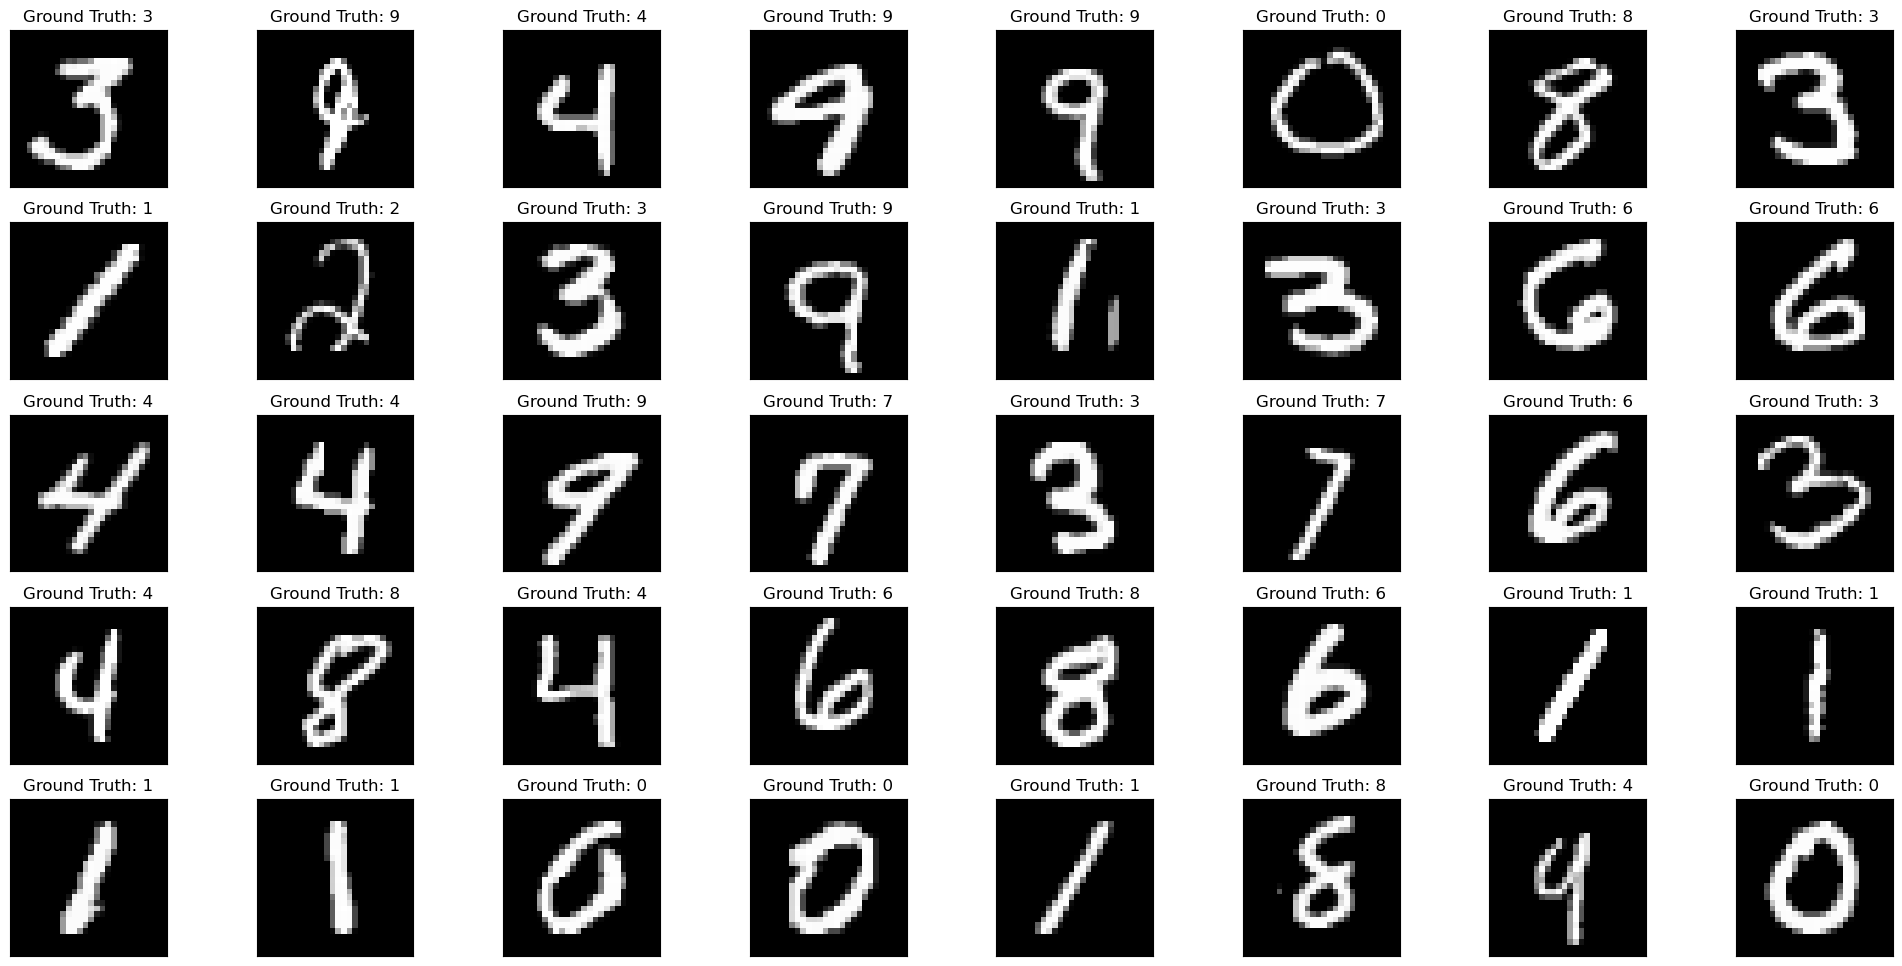

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

We will subsequently use the training data for training, and the test data for estimating the accuracy of our training. The next step is to define a convolutional neural network.

**Usage** of AI: *COMMENT HERE*

### 8.4 Building a CNN (5 points)

1. (4 points) Below you can see a diagram for a convolutional network, similar to the one you saw during the lecture. Translate this diagram into a PyTorch model by filling in the `Net` class below. After each max pooling step and after the first dense (linear) layer apply the relu activation function. You should use the modules `nn.Conv2d`, `nn.Linear` and the functions `F.max_pool2d` and `F.relu`.
Check the PyTorch documentation for these functions to see what parameters you must provide.

*Hint: Carefully think about the shapes of the intermediate layers and add padding to the convolutions where necessary, based on the information given below!*

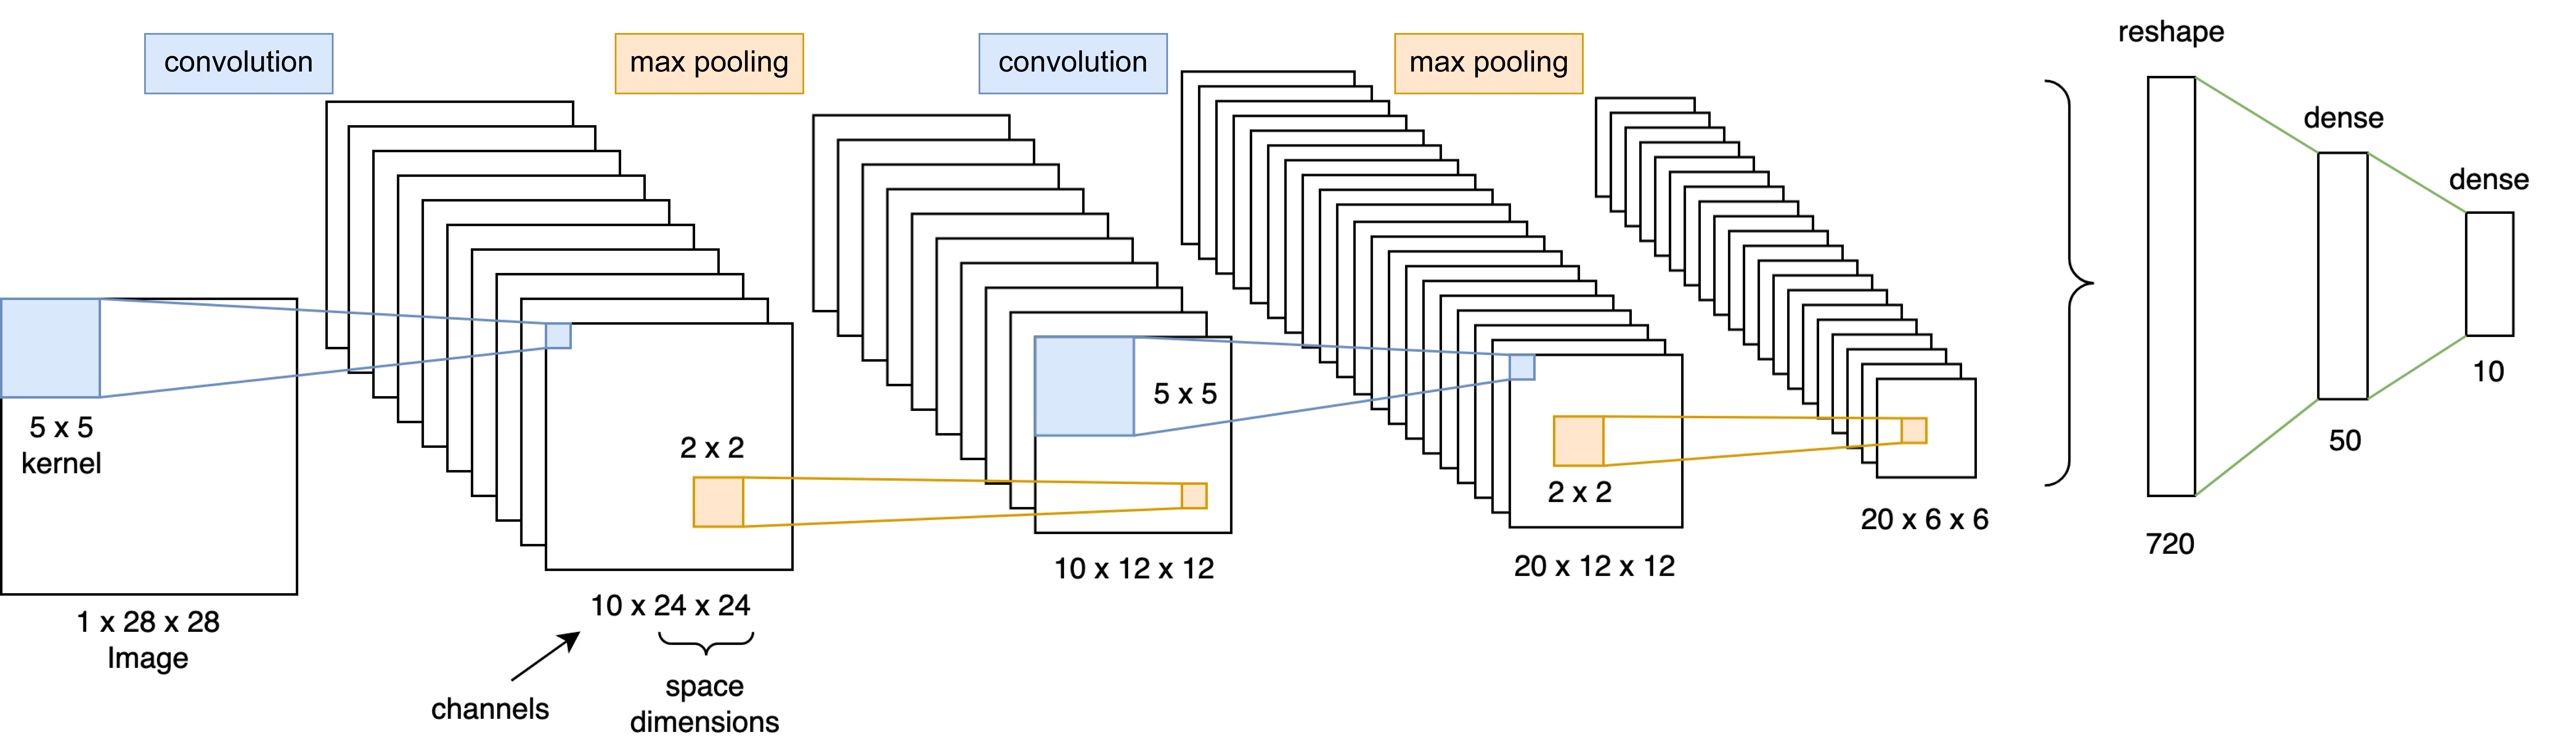

In [51]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # YOUR SOLUTION

    def forward(self, x):
        # YOUR SOLUTION
        return x

Now we define the optimizer, and instantiate the network.

In [53]:
learning_rate = 0.001

network = Net().to(DEVICE)  # We move the network to the GPU
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

n_epochs = 2  # 2 epochs by default.  Leave it like that throughout the subsequent exercises.

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]


# This is the main training loop
log_interval = 10
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(DEVICE)
        target = target.to(DEVICE)
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))


# This is the main testing loop
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(DEVICE)
            target = target.to(DEVICE)
            output = network(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

ValueError: optimizer got an empty parameter list

2. (1 point) Write down mathematically how the fraction of correct classifications on the test data is calculated in the above test function.

**Usage** of AI: *COMMENT HERE*

### 8.5 Evaluating the CNN's Performance (3 points)

Now let's do the training!

In [ ]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

Let's plot the training curve.

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Let's again look at a few examples as we did earlier in Section 9.1.2 and compare the model's output.

In [ ]:
with torch.no_grad():
    output = network(example_data.to(DEVICE))

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

1. (0.5 points) Run the above code and confirm that it has an accuracy of 98% or so. Explain why the initial accuracy is around 10%.

YOUR SOLUTION

2. (2.5 points) Let's compare this to a one-layer perceptron (i.e. no hidden layers). Write a new `class Net` that flattens the 28 x 28 images, passes them through one fully connected linear layer with input size 28 times 28 and outputs a 10 dimensional one-hot vector. What is the classification accuracy in this case? Are you surprised? Discuss how the accuracy compares to the accuracy from the CNN from before.

In [ ]:
#Your code here

YOUR SOLUTION

**Usage** of AI: *COMMENT HERE*